In [91]:
# Install necessary libraries
!pip install scikit-plot
!pip install opencv-python opencv-contrib-python scikit-learn
!pip install opencv-python


  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl (44.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Menna\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [51]:
# Import libraries
import os
import numpy as np
import skimage.io
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [143]:
# Function to load data
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    
    class_to_label = {class_name: i for i, class_name in enumerate(directories)}
    
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        label = class_to_label[d]
        for f in file_names:
            img = skimage.io.imread(f)
            img_resized = resize(img, (28, 28, 3))
            gray_img = rgb2gray(img_resized)
            images.append(gray_img.flatten())
            labels.append(label)
    return images, labels, class_to_label


In [144]:
# Example usage for both training and testing data
train_data_directory = r'C:\Food-101-minimized\train'
test_data_directory = r'C:\Food-101-minimized\test'

# Load training data
train_images, train_labels, class_to_label = load_data(train_data_directory)

# Load testing data
test_images, test_labels, class_to_label = load_data(test_data_directory)


C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


In [145]:
print(len(train_images))

print(len(test_images))

2100
900


In [146]:
# Function to load data with pixel normalization
def load_and_normalize_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    
    class_to_label = {class_name: i for i, class_name in enumerate(directories)}
    
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        label = class_to_label[d]
        for f in file_names:
            img = skimage.io.imread(f)
            img_resized = resize(img, (28, 28))
            gray_img = rgb2gray(img_resized)
            images.append(gray_img.flatten())
            labels.append(label)
    return images, labels, class_to_label


In [147]:
# Example usage for both training and testing data
train_data_normalized = r'C:\Food-101-minimized\train'
test_data_normalized = r'C:\Food-101-minimized\test'

# Load training data
train_data_normalized, train_labels_normalized, class_to_label  = load_and_normalize_data(train_data_normalized)

# Load testing data
test_data_normalized, test_labels_normalized, class_to_label  = load_and_normalize_data(test_data_normalized)


In [148]:
train_labels_normalized[-1]

2

In [149]:
print(len(train_images))

print(len(test_images))
print(class_to_label)

2100
900
{'cheesecake': 0, 'hamburger': 1, 'pizza': 2}


In [150]:
# Normalize pixel values between 0 and 1
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data_normalized)
test_data_normalized = scaler.transform(test_data_normalized)

In [151]:
# Create a logistic regression model (you can replace this with any other model)
model = LogisticRegression()


In [152]:
# Train the model
model.fit(train_data_normalized, train_labels_normalized)


C:\Users\Menna\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
# Make predictions on the test set
y_pred = model.predict(test_data_normalized)


In [154]:
# Evaluate the model
accuracy = accuracy_score(test_labels_normalized, y_pred)
classification_report_str = classification_report(test_labels_normalized, y_pred)
conf_matrix = confusion_matrix(test_labels_normalized, y_pred)


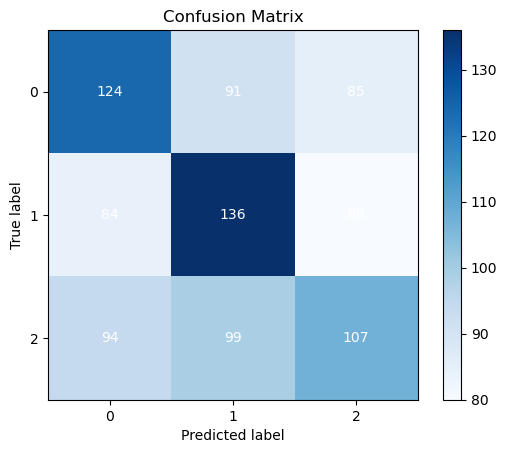

In [155]:
# Plot confusion matrix
plot_confusion_matrix(test_labels_normalized, y_pred, title='Confusion Matrix')
plt.show()

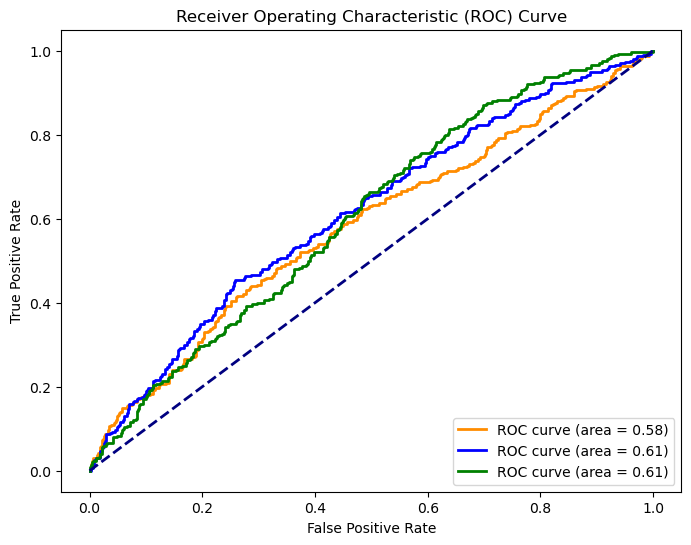

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Convert labels to binary format
y_bin = label_binarize(test_labels_normalized, classes=[0, 1, 2])

# Fit the classifier
classifier = OneVsRestClassifier(LogisticRegression(multi_class='ovr', max_iter=1000))
y_score = classifier.fit(train_data_normalized, train_labels_normalized).decision_function(test_data_normalized)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_to_label)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'blue', 'green']

for i, color in zip(range(len(class_to_label)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [157]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.4077777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       300
           1       0.42      0.45      0.43       300
           2       0.39      0.36      0.37       300

    accuracy                           0.41       900
   macro avg       0.41      0.41      0.41       900
weighted avg       0.41      0.41      0.41       900

Confusion Matrix:
[[124  91  85]
 [ 84 136  80]
 [ 94  99 107]]


In [184]:
def extract_hog_features(images, labels):
    hog_features_list = []
    labels_list = []
    
    for img, label in zip(images, labels):
        # Reshape the flattened image to its original shape
        img = img.reshape((28, 28))
        
        # Calculate HOG features directly on the grayscale image
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        
        # Append the HOG features and labels
        hog_features_list.append(hog_features)
        labels_list.append(label)
    
    return np.array(hog_features_list), np.array(labels_list)


In [185]:
# Example usage
train_data_with_hog_features, train_labels_with_hog_features = extract_hog_features(train_images, train_labels)
test_data_with_hog_features, test_labels_with_hog_features = extract_hog_features(test_images, test_labels)



In [186]:
scaler = MinMaxScaler()
train_data_normalized_hog = scaler.fit_transform(train_data_with_hog_features)
test_data_normalized_hog = scaler.transform(test_data_with_hog_features)


In [187]:
# Create a logistic regression model with one-versus-all strategy
model = LogisticRegression()


In [188]:
# Train the model
model.fit(train_data_normalized_hog, train_labels_with_hog_features)  



C:\Users\Menna\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
# Make predictions on the test set
y_pred = model.predict(test_data_normalized_hog)



In [195]:
# Evaluate the model
accuracy = accuracy_score(test_labels_with_hog_features, y_pred)  
classification_report_str = classification_report(test_labels_with_hog_features, y_pred)
conf_matrix = confusion_matrix(test_labels_with_hog_features, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6066666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       300
           1       0.55      0.44      0.49       300
           2       0.62      0.71      0.66       300

    accuracy                           0.61       900
   macro avg       0.60      0.61      0.60       900
weighted avg       0.60      0.61      0.60       900

Confusion Matrix:
[[200  64  36]
 [ 75 133  92]
 [ 44  43 213]]


In [196]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Define class labels
class_to_label = [0, 1, 2]  # Replace with your actual class labels

# Convert labels to binary format
y_bin = label_binarize(test_labels_with_hog_features, classes=class_to_label)



In [197]:
# Fit the classifier
classifier = OneVsRestClassifier(LogisticRegression(multi_class='ovr', max_iter=1000))
y_score = classifier.fit(train_data_normalized_hog, train_labels_with_hog_features).decision_function(test_data_normalized_hog)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_to_label)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



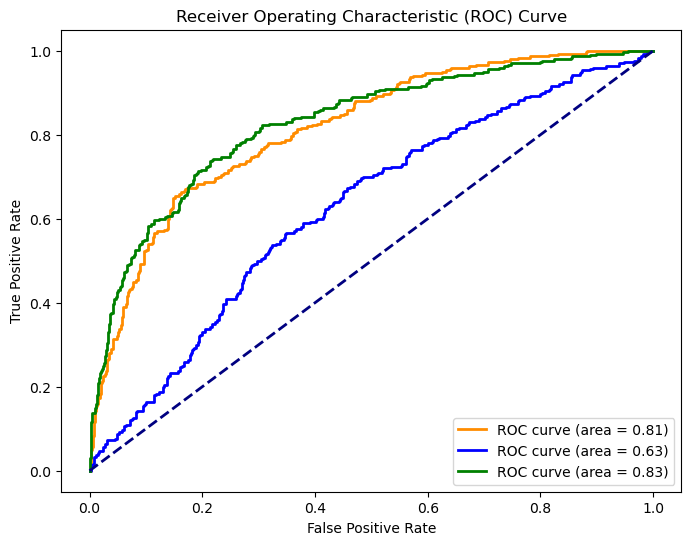

In [198]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'blue', 'green']

for i, color in zip(range(len(class_to_label)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


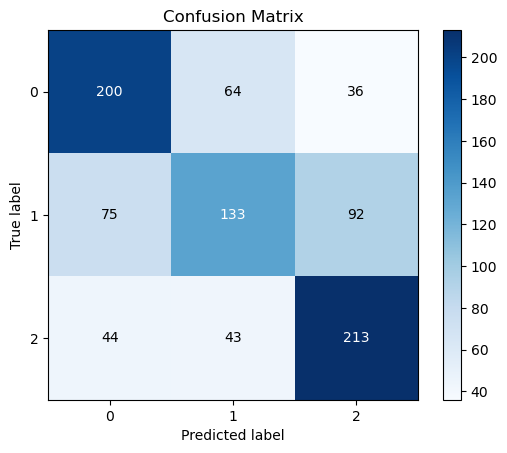

In [199]:
# Plot confusion matrix
plot_confusion_matrix(test_labels_normalized, y_pred, title='Confusion Matrix')
plt.show()

In [200]:
# Evaluate the model
accuracy = accuracy_score(test_labels_with_hog_features, y_pred)  
classification_report_str = classification_report(test_labels_with_hog_features, y_pred)
conf_matrix = confusion_matrix(test_labels_with_hog_features, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6066666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       300
           1       0.55      0.44      0.49       300
           2       0.62      0.71      0.66       300

    accuracy                           0.61       900
   macro avg       0.60      0.61      0.60       900
weighted avg       0.60      0.61      0.60       900

Confusion Matrix:
[[200  64  36]
 [ 75 133  92]
 [ 44  43 213]]
